# 수업 목적
- 1. RAG vs Fine-tuning 비교
- 2. RAG를 Fine-tuning으로 대체하기
- 3. [미션] 파인튜닝으로 요약정보 학습시키기

# 1. RAG vs Fine-tuning 비교

### Local LLM이 필요한 배경

- 시작하기 앞서 먼저 기업 얘기를 드릴게요.
- 삼성전자 등 중요 정보를 가진 기업들은 ChatGPT를 쓰기 어렵습니다.
  - 사내 임직원이 ChatGPT에 중요한 회사 정보들 전달해줄수도 있거든요.
  - ChatGPT처럼 외부에서 접속이 가능한 LLM을 Public LLM 이라고도 합니다.
  - 보안 차원에서 ChatGPT 자체를 못쓰게 막기도 합니다.

- 그렇다면!! 사내에서만 쓸 수 있는 Local LLM이 필요합니다.

### Local LLM을 사용했을 때 장점

- Public LLM은 우리 회사, 내부 정보를 모릅니다.
  - 세상 사람들이 알고있는 지식을 기반으로 답변을 합니다.
  - 하지만!! Local LLM은 다릅니다.
- Local LLM은 우리 회사, 내부 정보를 학습시킬 수 있습니다.
  - 우리 회사만의 내부정보를 알고있는 LLM을 만들 수 있습니다.
- 회사 뿐만아니라 개인화된 나만의 Local LLM을 만들 수 있습니다.
  - 나를 가장 잘 아는, 오직 나만의 친구를 만들수 있죠.


### RAG를 쓰면 Public LLM 으로도 회사 내부 정보를 알 수 있잖아요?

- 맞습니다.
- LangChain으로 OpenAI API + RAG 연동하여 회사 내부정보를 알고있는 LLM을 만들 수 있습니다.
- 하지만 회사 내부정보가 OpenAI API에게 넘어가게 됩니다.
  - RAG 기술 원리가.. 검색 정보를 LLM에게 넘겨준 후 답변을 하는 것이기 때문입니다.
- 그래서 회사에서는 Local LLM으로 Fine-tuning와 RAG를 사용합니다.

### 그럼 기업에서는 언제 RAG를 쓰고 언제 Fine-tuning을 할까요?

- 회사에 있는 정보를 모두 RAG 하지 않습니다.
- RAG는 이러한 것을 할 수 있습니다.
  - 유사성이 있는 문서를 검색하여 답변 퀄리티를 높혀줍니다.
  - **오늘 업데이트된 문서에 대해서도 LLM이 답변할 수 있습니다.**

- 그런데 문서 자체를 이해한건 아닙니다.
- 그래서 이런 질문은 RAG가 도움이 안됩니다.
  - bts.txt 파일 내용을 3줄 요약해줘 <--- RAG는 "3줄 요약해줘" 라는 문장과 유사한 키워드를 찾을겁니다.
- 대신 이런 질문은 도움이됩니다.
  - BTS 그룹은 총 몇명이지? <--- BTS 인원수 정보를 검색할겁니다.

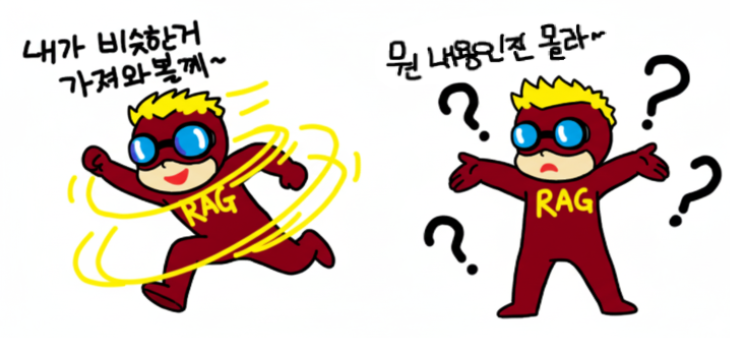

- RAG 대신 파인튜닝으로도 같은 효과를 낼 수 있습니다.
  - **외부 지식을, 모델 내부에 내장시킬 수 있습니다.**
  - 학습을 어떻게 시키냐에 따라, 검색과 동일한 효과를 낼수도 있습니다.
  - 잘 학습시키면, 요약정보도 얻을 수 있습니다.

- 하지만 새로운 문서가 나올때마다 Fine-tuning을 자주할 순 없겠죠.
  - 뭐 일정 기간이 되면 대규모 파인튜닝을 하면 되겠습니다.

- 그렇다고 파인튜닝이 최고가 아닙니다.
  - RAG는 원문 그대로 정확한 정보를 참고하여 답변합니다.
  - 파인튜닝은 원문 내용을 조금 변경할 수도 있습니다.

### 그 밖에 RAG와 Fine-tuning의 비교
  - RAG 보다는 Fine-tuning 모델이 답변을 더 빨리합니다.
  - RAG가 파인튜닝보다 항상 답변 품질이 좋은건 아닙니다. 파인튜닝을 잘하면, 오히려 더 복잡한 답변을 정확하게 답변할 수 있습니다.
  
### 결론
  - RAG와 파인튜닝은 결합해야합니다.
  - 기업에서는 두 가지를 함께 사용합니다.
  - 두 가지를 비교하면 다음과 같이 정리할 수 있습니다.
    - 전문성
      - 파인튜닝 : 특정 분야의 전문가로 만듭니다.
      - RAG : 최신 외부지식을 통해 모델이 최신 상태로 유지하도록 돕습니다.
    - 적응성
      - 파인튜닝은 불완전한 정보로도 유용한 답변을 할 수 있습니다.
      - RAG는 새로운 데이터마다 모델을 재학습 할 필요없이, 최신상태를 유지합니다.
    - 효율성
      - 파인튜닝은 모델의 많은 지식기반으로 새로운 지식을 융합합니다.
      - RAG는 빠르게 변하는 정보들을 받아들일 수 있습니다.
### RAG와 파인튜닝은 균형있게 설계되어야합니다.

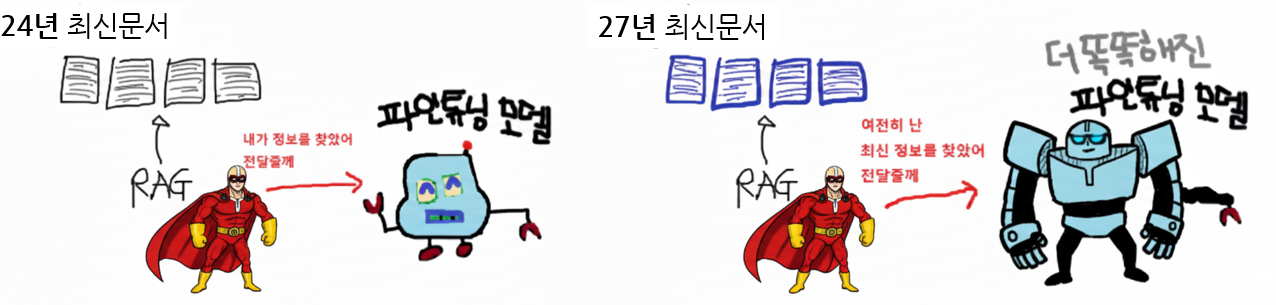

- 이제 실습을 해볼겁니다.
- **RAG에서 사용하던 정보를 파인튜닝으로 학습시키는 것을 목표로 할것입니다.**

# 2. 파인튜닝 전 준비 단계

- 파인튜닝 전과 후가 달라져야합니다!
  - 파인튜닝 전 : 정보가 없음
  - 파인튜닝 후 : RAG 했던 것과 비슷한 효과를 내야합니다.
- 먼저 파인튜닝 전, 추론테스트를 해보겠습니다.

### 추론테스트를 위한 Library 설치

- T4 GPU를 준비해주세요.

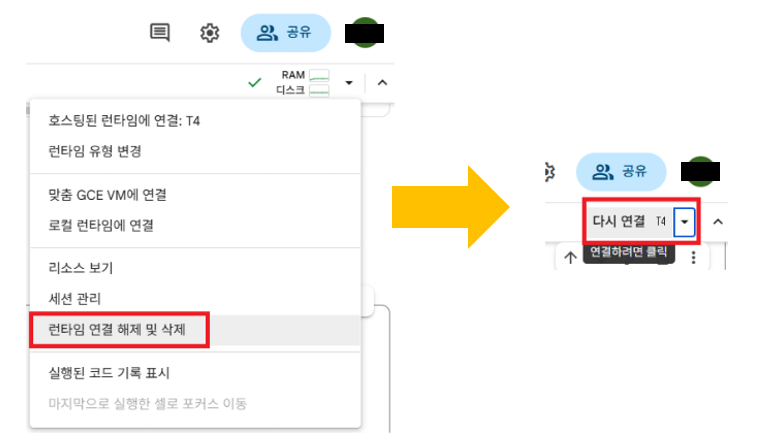

- Unsloth 공식 Document 내용을 그대로 사용합니다.

In [ ]:
%%capture
import os, re
if "COLAB_" not in "".join(os.environ.keys()):
    !pip install unsloth
else:
   # Colab은 아래 코드가 수행됩니다.
    import torch; v = re.match(r"[0-9\.]{3,}", str(torch.__version__)).group(0)
    xformers = "xformers==" + ("0.0.32.post2" if v == "2.8.0" else "0.0.29.post3")
    !pip install --no-deps bitsandbytes accelerate {xformers} peft trl triton cut_cross_entropy unsloth_zoo
    !pip install sentencepiece protobuf "datasets>=3.4.1,<4.0.0" "huggingface_hub>=0.34.0" hf_transfer
    !pip install --no-deps unsloth
!pip install transformers==4.56.2
!pip install --no-deps trl==0.22.2

### Model 로드
- 파인튜닝할 모델은 Qwen3을 4bit 양자화한 모델입니다.

In [ ]:
from unsloth import FastLanguageModel
import torch

model, tokenizer = FastLanguageModel.from_pretrained(
    model_name = "unsloth/Qwen3-4B-Instruct-2507",
    max_seq_length = 2048, # Choose any for long context!
    load_in_4bit = True,  # 4 bit quantization to reduce memory
    load_in_8bit = False, # [NEW!] A bit more accurate, uses 2x memory
    full_finetuning = False, # [NEW!] We have full finetuning now!
)

🦥 Unsloth: Will patch your computer to enable 2x faster free finetuning.
🦥 Unsloth Zoo will now patch everything to make training faster!
==((====))==  Unsloth 2025.10.10: Fast Qwen3 patching. Transformers: 4.56.2.
   \\   /|    NVIDIA A100-SXM4-40GB. Num GPUs = 1. Max memory: 39.557 GB. Platform: Linux.
O^O/ \_/ \    Torch: 2.8.0+cu126. CUDA: 8.0. CUDA Toolkit: 12.6. Triton: 3.4.0
\        /    Bfloat16 = TRUE. FA [Xformers = 0.0.32.post2. FA2 = False]
 "-____-"     Free license: http://github.com/unslothai/unsloth
Unsloth: Fast downloading is enabled - ignore downloading bars which are red colored!


model.safetensors:   0%|          | 0.00/3.55G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/237 [00:00<?, ?B/s]

tokenizer_config.json: 0.00B [00:00, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

added_tokens.json:   0%|          | 0.00/707 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/614 [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/11.4M [00:00<?, ?B/s]

chat_template.jinja: 0.00B [00:00, ?B/s]

### 추론 해보기
- 모델 추론을 담당하는 함수를 하나 만듭니다.

In [ ]:
from transformers import TextStreamer
# Helper function for inference
def do_qwen3_inference(messages, max_new_tokens = 512):
    _ = model.generate(
        **tokenizer.apply_chat_template(
            messages,
            add_generation_prompt = True, # Must add for generation
            tokenize = True,
            return_dict = True,
            return_tensors = "pt",
        ).to("cuda"),
        max_new_tokens = max_new_tokens,
        temperature = 1.2, top_p = 0.9, top_k = 50,
        streamer = TextStreamer(tokenizer, skip_prompt = True, skip_special_tokens=True),
    )

- 파인튜닝 하기 전, RAG할 데이터를 알고있는지 테스트해봅시다.
  - 잘 몰라야 성공입니다!
  - 파인튜닝 후에는 알게되겠죠?

In [ ]:
messages = [{
    "role": "user",
    "content": "안데르센의 눈의여왕이라는 단편소설 아니?"
}]

do_qwen3_inference(messages)

아니요, "안데르슨의 눈의 여왕"이라는 단편소설은 존재하지 않습니다.

여기서 혼동이 생긴 것으로 보입니다. 아마도 의도하신 것은 **앤드레스 기른센**(Hans Christian Andersen)의 작품일 가능성이 높습니다. 특히 "눈의 여왕"이라는 제목은 **안데르슨의 '눈의 여왕'**(The Queen of the Night, 혹은 영문 제목인 *The Queen of the Night*)이라고도 불리는 이야기와 연결됩니다.

하지만 정확히는 안데르슨의 작품 중에 **정확히 "눈의 여왕"이라는 제목의 전통적인 단편 소설은 존재하지 않습니다**.

---

다만, 안데르슨의 유명한 단편 중에서 **"눈의 여왕"**(The Queen of the Night) 또는 **"눈의 여왕이 된 여자들"**처럼 비슷한 제목이 등장하는 경우는 다음과 같습니다:

### 1. **"안데르슨의 눈의 여왕" 오해 가능 이유**
- **오랜 전통적인 이야기 중** '눈의 여왕'이 등장하는 경우는 있지만, 주로 **현대 영화나 드라마**에서 외화로 재창조된 사례입니다.
- 예를 들어, 2010년대 들어 **'눈의 여왕'**(The Queen of the Night)이라는 제목을 가진 영화나 드라마가 있음에도, 이는 **안데르슨의 작품이 아니라** 영화의 스토리이거나 외부의 콘텐츠입니다.

### 2. 정확한 안데르슨의 작품 예시
안데르슨의 대표작 중 **"눈"을 다루는 소설이나 이야기**는 다음과 같은 사례가 있습니다:

- **《눈의 여왕》**은 존재하지 않습니다.
- **《눈의 화이트라인》**, **《눈이 가득한 밤》** 같은 제목도 없습니다.
- 하지만 **눈을 주제로 한 이야기**는 매우 많습니다. 예를 들어:
  - **《단풍나무》** (The Little Match Girl)
  - **《눈이 온 날》**(The Nightingale, 혹은


# 3. RAG 처럼 파인튜닝 해보기

### 눈의여왕 pdf 준비
- 학습할 pdf 다운로드를 합니다.
- 안데르센의 "눈의여왕"이라는 스토리입니다.
  - 스토리 3줄요약
    - 악마가 만든 거울이 부셔졌고, 그 조각이 사람에게 박히면 세상을 부정적으로 보게된다.
    - 여자아이인 게르다와 남자아이 카이는 서로 가족처럼 아끼는 사이다.
    - 카이가 눈과 심장에 거울 조각이 들어가면서 변했다.
    - 그러고는 카이는 눈의 여왕을 따라 얼음 궁전으로, 게르다를 냅두고 떠난다.
    - 게르다는 친구를 찾기위해 험한 여행을 떠난다.
    - 강물의 여신, 마녀, 왕자와공주, 도적소녀 등 여러 에피소드가 있다.
    - 결국 게르다는 눈의여왕을 찾아냈고, 따뜻한 마음이 카이가 회복되었다.
    - 게르다와 카이의 사랑에 눈의여왕이 그만 사라지게되었다.(??)
    - 거울조각의 마법은 완전히 사라지고 세상이 다시 따뜻해졌다.

- 라이센스 문제가 없는 공개 자료입니다.

In [ ]:
!git clone https://github.com/withSG/The-Snow-Queen

Cloning into 'The-Snow-Queen'...
remote: Enumerating objects: 3, done.
remote: Counting objects: 100% (3/3), done.
remote: Compressing objects: 100% (2/2), done.
remote: Total 3 (delta 0), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (3/3), 233.06 KiB | 2.99 MiB/s, done.


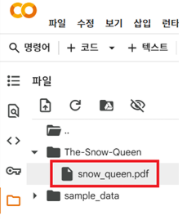

### 목적
- 이 문서를 기반으로 RAG를 적용하면 다음과 같은 것이 가능합니다
  - 사용자 질문에 관련된 문서에 내용을 찾아 답변
- 이 문서를 RAG 없이도, 같은 효과를 내도록 파인튜닝 할것입니다.

- 그런데 원문을 파인튜닝하기에는 쉬운일이 아닙니다.
  - 기존 파인튜닝은 "질문" -> "대답" 형태로 파인튜닝을 했었거든요!!

### 파인튜닝 방법
- 그럼 어떻게 할까요!?
  - **바로 원문을 "질문" -> "대답" 형태로 데이터 전처리를 해야합니다!!**
  - 이후 파인튜닝 수행하면 RAG와 같은 효과를 낼 수 있습니다.

- 다음과 과정으로 파인튜닝을 할것입니다.
  1. RAG를 이용하여 '질문' -> '대답' 형태로 데이터 수집하기
      - 이를 QA데이터 수집이라고 합니다!
  2. QA데이터로 파인튜닝하기

#4. QA 데이터 수집하기
- QA 데이터를 만들기 위해 RAG를 사용할겁니다!

### API Key 등록
- 임베딩모델과 LLM Model을 사용해야하므로, OpenAI Key를 준비합시다.

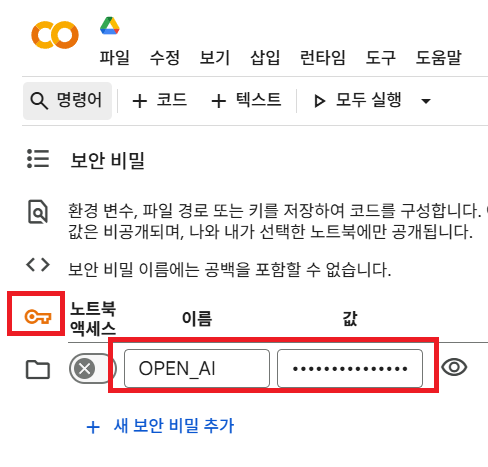

- 필요한 도구를 설치합니다.
- OpenAI API Key를 환경변수로 등록합니다.



In [ ]:
%%capture
!pip install langchain langchain-openai
!pip install --upgrade langchain # 랭체인 공식 버전으로 설치됩니다

import os, sys
from google.colab import userdata
os.environ["OPENAI_API_KEY"] = userdata.get("OPEN_AI")

### PDF파일 청킹하기
- 청크 단위로 '질문' -> '대답' 형태의 데이터를 만들 예정입니다.
- 먼저 pdf를 청킹 진행합니다. pdf파일을 읽기 위해 pypdf 를 설치합니다.

In [ ]:
# 실습에 필요한 라이브러리들을 설치합니다.
%%capture
!pip install langchain-community pypdf

In [ ]:
from langchain_community.document_loaders import PyPDFLoader
from langchain_text_splitters import RecursiveCharacterTextSplitter

# 1. Load: PDF 파일 불러오기
loader = PyPDFLoader("./The-Snow-Queen/snow_queen.pdf")
documents = loader.load()

# 2. Split: 문서를 3000자 단위로 자르기 (엔터 단위, 300자씩 겹치게)
splitter = RecursiveCharacterTextSplitter(
    chunk_size=3000,
    chunk_overlap=300
)
chunks = splitter.split_documents(documents)

print("\n--- 3000자 단위로 잘린 문서 조각(Chunk)들 ---")
for i, chunk in enumerate(chunks):
    print(f"[Chunk {i+1}]")
    print(chunk.page_content)
    print()


--- 3000자 단위로 잘린 문서 조각(Chunk)들 ---
[Chunk 1]
[Andersen 단편선] 눈의 여왕김선희 역1)
일곱 가지 이야기첫 번째 이야기거울과 거울 조각자, 그럼! 시작할까. 이 이야기가 끝나면 여러분은 의외로 많은 것을 알게 될 것이다. 이 녀석은 아주 성질이 사나운 호브고블린이다. 이 고블린은 아주 사악한 종류의 도깨비요정으로, 사실 악마나 다름없었다. 어느 날 이 악마가 요상한 힘이 있는 거울을 마침내 완성해기분이 무척 좋았다. 이 거울은 선하거나 아름다운 것을 비추면 쪼그라들어 거의 보이지 않고, 반면에 아무짝에 쓸모없고 추한 것은 도드라지면서 훨씬 더 추하게 보였다. 이 거울에서 아름다운 풍경은 끓는 물에 데친 시금치처럼 보이고 아주 선한 사람은 섬뜩해 보이거나 물구나무를 섰다. 얼굴은 알아볼 수 없을 만큼 일그러졌다. 주근깨가 하나 있는 사람이라면 코와 입까지 죄다 주근깨로 뒤덮여 있는 것처럼 보였다. “아주 웃기는군!”악마가 말했다. 사람의 마음에 흐르는 선하고 경건한 생각도 이 거울에서는 음흉한 미소로 보였다. 악마는 이 독창적인 발명품에 크게 웃음을 터뜨렸다. 이 악마가 가르치는 호브고블린 학교 학생 악마들은 기적이 일어났다고 모두에게 알렸다. 이제 이 악마들은 처음으로 이 세상과 세상 사람들이 진짜로 어떻게 보이는지 알 수 있다며 떠들어댔다. 녀석들은 이 거울을 들고 허둥지둥 여기저기 돌아다녔다. 마침내 지구상에 살아있는 사람이나 대지는 이 거울로 온갖 수난을 당했다. 이윽고 악마들은 하늘로 올라가서 천사 그리고 신을 조롱하고 싶었다. 거울을 들고 높이 올라가면 갈수록, 악마들이 거울을 움켜잡을 수 없을 만큼 거울은 점점 더 끔찍하게 웃었다. 더 높이 더 높이, 천국과 천사에 점점 더 가까이 갔다. 문득 그 웃음 짓는 거울이 무지막지하게 흔들리더니 녀석들의 손에서 미끄러져 나가 땅으로 떨어져서 수천, 수만, 수백만, 수십억 조각으로 산산이 부서졌다. 어쩌면 그보다 더 잘게 깨졌을 것이다. 이제 이 거울은 깨지기 전보

### SQLite DB 생성 및 초기화
- 최종적으로 만들어진 QA 데이터를 SQLite라는 DB에 저장할겁니다!
- SQLite는 파일 기반으로 저장되는 Local DB 입니다.
  - Spring Framework에서 사용되는 H2 DB(*임시용 데이터베이스)로 비유할수 있습니다~.
  - sentense : 원문의 한 문장
  - question : 한 문장을 보고, 생성한 질문
  - answer : 질문에 대한 대답

In [ ]:
import sqlite3

# DB 초기화
conn = sqlite3.connect("qa_dataset.db")
cursor = conn.cursor()

cursor.execute("""
CREATE TABLE IF NOT EXISTS qa_data (
    id INTEGER PRIMARY KEY AUTOINCREMENT,
    sentence TEXT,
    question TEXT,
    answer TEXT
)
""")

conn.commit()

### LangChain 으로 QA 데이터 만들기
- 본격적으로 LangChain을 사용하여 QA 데이터를 만들어봅시다.
- 원리는 다음과 같습니다.
  - Model의 역할 : 한 줄의 문장을 보고, ['질문', '답변'] 형태의 문자열로 생성 후
    - 입력 예시 : 철수는 길을 가다가 만원을 주었다.
    - 출력 예시 : ['철수는 무엇을 주었나요?', '만원']

  - save_node 컴포넌트
    - LLM 출력 문자열에서 [question, answer] 쌍을 정규식으로 추출합니다.
    - 성공적으로 추출된다면 DB에 데이터를저장합니다.

In [ ]:
import re
from langchain.chat_models import init_chat_model
from langchain_core.prompts import ChatPromptTemplate
from langchain_core.output_parsers import StrOutputParser
from langchain_core.runnables import RunnableLambda

# =====================================================
# 시스템 프롬프트
# =====================================================
prompt = ChatPromptTemplate.from_template("""
너는 AI 학습용 데이터를 만드는 보조자야.
입력 문장을 보고, [question, answer] 형태의 퀴즈를 1개 만들어줘.

퀴즈의 타입 예시 :
- 이름이나 지역, 명칭을 물어보는 질문
- 등장인물의 특징, 서술형태를 물어보는 질문
- 지역, 시간을 물어보는 질문

출력 형식:
["질문","답"]

입력 문장:
{input_chunk}
""")

# =====================================================
# DB 저장 함수
# =====================================================
def save_to_db(text: str):
    try:
        # 정규식으로 ["질문", "답"] 형태를 모두 찾는다.
        pattern = r'\[\s*"(?P<question>[^"]+)"\s*,\s*"(?P<answer>[^"]+)"\s*\]'
        matches = list(re.finditer(pattern, text))

        if not matches:
            print("[경고] 추출된 [question, answer] 쌍이 없습니다.")
            return None, None

        last_q, last_a = None, None

        # 잘 찾았으니, DB에 저장한다.
        for match in matches:
            arg1 = match.group("question").strip()
            arg2 = match.group("answer").strip()
            cursor.execute(
                "INSERT INTO qa_data (sentence, question, answer) VALUES (?, ?, ?)",
                (current_sentence, arg1, arg2)
            )
            last_q, last_a = arg1, arg2  # 마지막 쌍 기억

        conn.commit()
        print(f"✅ 저장 완료 ({len(matches)}개)")
        return last_q, last_a

    except Exception as e:
        print(f"[ERROR] 파싱 실패: {e}")
        return None, None

# RunnableLambda로 감싸기
save_node = RunnableLambda(save_to_db)
model = init_chat_model("openai:gpt-4o-mini")
parser = StrOutputParser()

# =====================================================
# Chain 구성
# =====================================================
chain = prompt | model | parser | save_node


### Agent 실행

In [ ]:
for i, chunk in enumerate(chunks, start=1):
    current_sentence = chunk.page_content
    print(f"\n=== [Chunk {i}] ===")
    print(chunk.page_content)

    for _ in range(5):
        q, a = chain.invoke({"input_chunk": chunk.page_content})

        if q and a:
            print(f"🧠 퀴즈 ----> Q: {q} / A: {a}")
        else:
            print("⚠️ 퀴즈 생성 실패 또는 추출 불가")


=== [Chunk 1] ===
[Andersen 단편선] 눈의 여왕김선희 역1)
일곱 가지 이야기첫 번째 이야기거울과 거울 조각자, 그럼! 시작할까. 이 이야기가 끝나면 여러분은 의외로 많은 것을 알게 될 것이다. 이 녀석은 아주 성질이 사나운 호브고블린이다. 이 고블린은 아주 사악한 종류의 도깨비요정으로, 사실 악마나 다름없었다. 어느 날 이 악마가 요상한 힘이 있는 거울을 마침내 완성해기분이 무척 좋았다. 이 거울은 선하거나 아름다운 것을 비추면 쪼그라들어 거의 보이지 않고, 반면에 아무짝에 쓸모없고 추한 것은 도드라지면서 훨씬 더 추하게 보였다. 이 거울에서 아름다운 풍경은 끓는 물에 데친 시금치처럼 보이고 아주 선한 사람은 섬뜩해 보이거나 물구나무를 섰다. 얼굴은 알아볼 수 없을 만큼 일그러졌다. 주근깨가 하나 있는 사람이라면 코와 입까지 죄다 주근깨로 뒤덮여 있는 것처럼 보였다. “아주 웃기는군!”악마가 말했다. 사람의 마음에 흐르는 선하고 경건한 생각도 이 거울에서는 음흉한 미소로 보였다. 악마는 이 독창적인 발명품에 크게 웃음을 터뜨렸다. 이 악마가 가르치는 호브고블린 학교 학생 악마들은 기적이 일어났다고 모두에게 알렸다. 이제 이 악마들은 처음으로 이 세상과 세상 사람들이 진짜로 어떻게 보이는지 알 수 있다며 떠들어댔다. 녀석들은 이 거울을 들고 허둥지둥 여기저기 돌아다녔다. 마침내 지구상에 살아있는 사람이나 대지는 이 거울로 온갖 수난을 당했다. 이윽고 악마들은 하늘로 올라가서 천사 그리고 신을 조롱하고 싶었다. 거울을 들고 높이 올라가면 갈수록, 악마들이 거울을 움켜잡을 수 없을 만큼 거울은 점점 더 끔찍하게 웃었다. 더 높이 더 높이, 천국과 천사에 점점 더 가까이 갔다. 문득 그 웃음 짓는 거울이 무지막지하게 흔들리더니 녀석들의 손에서 미끄러져 나가 땅으로 떨어져서 수천, 수만, 수백만, 수십억 조각으로 산산이 부서졌다. 어쩌면 그보다 더 잘게 깨졌을 것이다. 이제 이 거울은 깨지기 전보다 훨씬 더 큰 문제를 일으켰다. 어떤 것은 모래

### QA 데이터 생성완료! 저장된 DB 확인
- Pandas Library로 SQLite 데이터를 출력해봅시다.

In [ ]:
import sqlite3, pandas as pd

conn = sqlite3.connect("qa_dataset.db")
df = pd.read_sql_query("SELECT question, answer FROM qa_data LIMIT 30", conn)

styled = df.style.set_properties(**{'text-align': 'left'})
display(styled)

,question,answer
0,이 이야기에 등장하는 호브고블린의 주된 발명품은 무엇인가?,마법의 거울
1,게르다와 카이의 이름을 말해주는 할머니는 무엇에 대해 이야기하고 있나요?,하얀 꿀벌과 여왕벌
2,카이는 무엇을 보고 아프다고 외쳤나요?,교회 탑의 시계가 다섯 번 울렸을 때 자신의 가슴이 아프다고 외쳤다.
3,카이는 게르다의 그림책에 대해 무엇이라고 말했나요?,그건 요람에 든 아기들에게나 딱 맞는 책이라고 말했다.
4,여왕이 카이에게 무엇을 했을 때 카이는 더 이상 추위를 느끼지 않게 되었나요?,여왕이 카이의 이마에 입을 맞추었을 때
5,게르다는 강가에 가기 위해 무엇을 신었나요?,빨간색 구두
6,게르다가 장미를 보고 눈물을 터뜨린 이유는 무엇인가요?,장미가 하나도 없어서 슬펐기 때문이다.
7,게르다가 찾고 있는 사람의 이름은 무엇인가요?,카이
8,게르다가 카이를 찾기 위해 어디로 가려고 했나요?,집으로 돌아갈 거라고 했어요.
9,게르다가 이야기한 것은 무엇인가?,그는 혼자서 어디로 가고 있는지에 대한 것이다.


# 5. 파인튜닝

### 5-2. Model 로드 / 추론해보기
- Qwen3 모델을 허깅페이스에서 다운로드 및 로드합니다.
- unsloth에서 4bit 양자화 한 모델을 사용합니다.

In [ ]:
from unsloth import FastLanguageModel
import torch

model, tokenizer = FastLanguageModel.from_pretrained(
    model_name = "unsloth/Qwen3-4B-Instruct-2507",
    max_seq_length = 2048, # Choose any for long context!
    load_in_4bit = True,  # 4 bit quantization to reduce memory
    load_in_8bit = False, # [NEW!] A bit more accurate, uses 2x memory
    full_finetuning = False, # [NEW!] We have full finetuning now!
)

==((====))==  Unsloth 2025.10.9: Fast Qwen3 patching. Transformers: 4.56.2.
   \\   /|    Tesla T4. Num GPUs = 1. Max memory: 14.741 GB. Platform: Linux.
O^O/ \_/ \    Torch: 2.8.0+cu126. CUDA: 7.5. CUDA Toolkit: 12.6. Triton: 3.4.0
\        /    Bfloat16 = FALSE. FA [Xformers = 0.0.32.post2. FA2 = False]
 "-____-"     Free license: http://github.com/unslothai/unsloth
Unsloth: Fast downloading is enabled - ignore downloading bars which are red colored!


### 5-3. LoRA 어댑터 추가하기
- LoRA 어댑터를 추가합니다.
- 이 어댑터에 있는 소량의 파라미터만 학습할 예정입니다!
- 이 어댑터의 Output 은 원래 가중치(W)에 더해질 가중치 값입니다. (delta W를 근사하는 A, B들)

In [ ]:
model = FastLanguageModel.get_peft_model(
    model,
    r = 32, # Choose any number > 0 ! Suggested 8, 16, 32, 64, 128
    target_modules = ["q_proj", "k_proj", "v_proj", "o_proj",
                      "gate_proj", "up_proj", "down_proj",],
    lora_alpha = 32,
    lora_dropout = 0, # Supports any, but = 0 is optimized
    bias = "none",    # Supports any, but = "none" is optimized
    # [NEW] "unsloth" uses 30% less VRAM, fits 2x larger batch sizes!
    use_gradient_checkpointing = "unsloth", # True or "unsloth" for very long context
    random_state = 3407,
    use_rslora = False,  # We support rank stabilized LoRA
    loftq_config = None, # And LoftQ
)

### 5-4. 모델의 입력 포맷 확인하기
- 모델마다 사용하는 포맷이 있습니다.
  - Qwen이 사전학습될때 사용했되었던... 모델 고유의 포맷입니다.
  - 따라서 추가 학습할때도, 이 포맷에 맞추어 데이터를 넣어줘야합니다.

- 이렇게 언어마다 사용하는 포맷을 "**chat template**" 이라고 합니다.

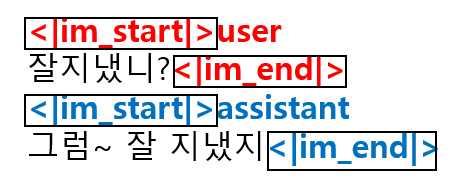

### 데이터 셋을 로드합시다.

In [ ]:
import sqlite3
import pandas as pd
from datasets import Dataset

# 1️⃣ SQLite에서 데이터 불러오기
DB_PATH = "qa_dataset.db"

conn = sqlite3.connect(DB_PATH)
df = pd.read_sql_query("SELECT question, answer FROM qa_data", conn)
conn.close()

print(f"✅ 불러온 데이터 수: {len(df)}개")

# 2️⃣ pandas → Hugging Face Dataset 변환
dataset_origin = Dataset.from_pandas(df)

# 3️⃣ 확인
print(dataset_origin)
dataset_origin[0]

✅ 불러온 데이터 수: 126개
Dataset({
    features: ['question', 'answer'],
    num_rows: 126
})


{'question': '이 이야기에 등장하는 호브고블린의 주된 발명품은 무엇인가?', 'answer': '마법의 거울'}

### 5-6. Chat Template에 맞춰 포맷 변경하기
- Chat Template으로 바꾸려면 다음 순서로 바꾸는 것을 가이드하고 있습니다.
- 이는 유지보수의 편의성 위한 허깅페이스의 권장 가이드입니다!

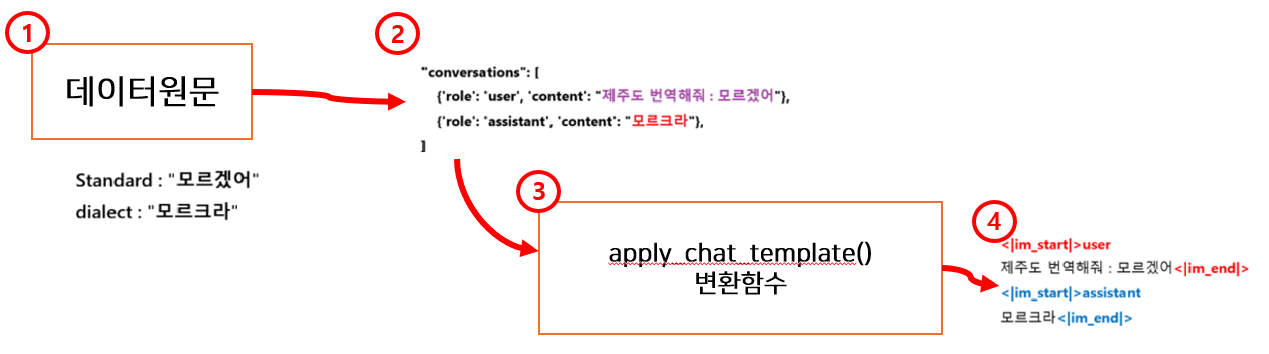

In [ ]:
# 원본 데이터는 'question', 'answer' 컬럼으로 구성되어 있습니다.
# 이것을 Gemma나 OpenAI fine-tuning용 대화 형식으로 변환합니다.
def format_qa_data(example):
    return {
        "conversations": [
            {"role": "user", "content": f'다음은 안데르센의 "눈의여왕" 단편 소설에 대한 질문이야 : {example["question"]}'},
            {"role": "assistant", "content": example["answer"]},
        ]
    }

# map 함수를 사용해 데이터셋 전체에 적용
dataset = dataset_origin.map(format_qa_data, remove_columns=list(dataset_origin.features))

Map:   0%|          | 0/126 [00:00<?, ? examples/s]

- 변환이 잘 되었는지 출력해봅시다.

In [ ]:
dataset[100]['conversations']

[{'content': '다음은 안데르센의 "눈의여왕" 단편 소설에 대한 질문이야 : 카이가 게르다에게 보여준 눈꽃의 특징은 무엇인가?',
  'role': 'user'},
 {'content': '눈꽃은 매우 완벽하고 흠잡을 데가 없으며, 거대한 십각형의 별처럼 보였다.', 'role': 'assistant'}]

- 이제 apply_chat_template() 를 거치면, 모델이 원하는 포맷이 완성됩니다.
  - qwen3용 chat template 객체를 먼저 생성합니다.
  - 이후 apply_chat_template()을 이용하여 최종 포맷으로 변경합니다.


In [ ]:
from unsloth.chat_templates import get_chat_template
tokenizer = get_chat_template(
    tokenizer,
    chat_template = "qwen3-instruct",
)

In [ ]:
def formatting_prompts_func(examples):
   convos = examples["conversations"]
   texts = [tokenizer.apply_chat_template(convo, tokenize = False, add_generation_prompt = False) for convo in convos]
   return { "text" : texts, }

dataset = dataset.map(formatting_prompts_func, batched = True)

Map:   0%|          | 0/126 [00:00<?, ? examples/s]

- 완성된 포맷을 확인해봅시다.

In [ ]:
dataset[100]['text']

'<|im_start|>user\n다음은 안데르센의 "눈의여왕" 단편 소설에 대한 질문이야 : 카이가 게르다에게 보여준 눈꽃의 특징은 무엇인가?<|im_end|>\n<|im_start|>assistant\n눈꽃은 매우 완벽하고 흠잡을 데가 없으며, 거대한 십각형의 별처럼 보였다.<|im_end|>\n'

### 5-7. 모델 학습 준비
- 이제 학습을 진행할 '트레이너(Trainer)'를 설정합니다.
- 트레이너는 모델, 토크나이저, 데이터셋을 받아 학습 과정을 총괄하는 감독관과 같습니다.
  - 이곳에서 하이퍼파라미터들을 세팅합니다.

In [ ]:
from trl import SFTTrainer, SFTConfig
trainer = SFTTrainer(
    model = model,
    tokenizer = tokenizer,
    train_dataset = dataset,
    eval_dataset = None, # Can set up evaluation!
    args = SFTConfig(
        dataset_text_field = "text",
        per_device_train_batch_size = 2,
        gradient_accumulation_steps = 4, # Use GA to mimic batch size!
        warmup_steps = 5,
        # num_train_epochs = 1, # Set this for 1 full training run.
        max_steps = 60,
        learning_rate = 2e-4, # Reduce to 2e-5 for long training runs
        logging_steps = 1,
        optim = "adamw_8bit",
        weight_decay = 0.01,
        lr_scheduler_type = "linear",
        seed = 3407,
        report_to = "none", # Use TrackIO/WandB etc
    ),
)

Unsloth: Tokenizing ["text"] (num_proc=6):   0%|          | 0/126 [00:00<?, ? examples/s]

### 5-8. 명령과 답변 구분해주기
- 모델은 "질문"을 생성해야 하는 것이아니라, "답변" 부분만 예측하여 문장을 생성해야합니다.
- 아래는 모델이 예측해야할 "답변" 부분이 어딘지지 알려주는 코드입니다

In [ ]:
from unsloth.chat_templates import train_on_responses_only
trainer = train_on_responses_only(
    trainer,
    instruction_part = "<|im_start|>user\n",
    response_part = "<|im_start|>assistant\n",
)

Map (num_proc=6):   0%|          | 0/126 [00:00<?, ? examples/s]

### 5-9. 학습 시작!
- Loss가 줄어드는 모습을 확인할 수 있습니다.
- Loss가 전반적으로 줄어들지 않으면 학습이 안되고 있는 것입니다

In [ ]:
trainer_stats = trainer.train()

The tokenizer has new PAD/BOS/EOS tokens that differ from the model config and generation config. The model config and generation config were aligned accordingly, being updated with the tokenizer's values. Updated tokens: {'bos_token_id': None}.
==((====))==  Unsloth - 2x faster free finetuning | Num GPUs used = 1
   \\   /|    Num examples = 126 | Num Epochs = 4 | Total steps = 60
O^O/ \_/ \    Batch size per device = 2 | Gradient accumulation steps = 4
\        /    Data Parallel GPUs = 1 | Total batch size (2 x 4 x 1) = 8
 "-____-"     Trainable parameters = 66,060,288 of 4,088,528,384 (1.62% trained)


Step,Training Loss
1,4.538100
2,3.888300
3,3.442700
4,3.915900
5,2.693000
6,2.616700
7,2.276700
8,2.238700
9,2.391400
10,1.773200


### 파인튜닝된 모델 테스트하기

- 학습이 끝난 모델이 얼마나 똑똑해졌는지 테스트해볼 시간입니다.
- 모델에게 눈의여왕 소설에 대한 질문에 답변이 가능한지 확인합니다.

In [ ]:
messages = [
    {"role" : "user", "content" : "눈의여왕 소설에서 게르다가 찾고 있는 사람은 누구야? "} # 정답 = 카이
]
text = tokenizer.apply_chat_template(
    messages,
    tokenize = False,
    add_generation_prompt = True, # Must add for generation
)

from transformers import TextStreamer
_ = model.generate(
    **tokenizer(text, return_tensors = "pt").to("cuda"),
    max_new_tokens = 1000, # Increase for longer outputs!
    temperature = 0.7, top_p = 0.8, top_k = 20, # For non thinking
    streamer = TextStreamer(tokenizer, skip_prompt = True, skip_special_tokens=True),
)

카이<|im_end|>


### 랭체인에서 파인튜닝된 모델 사용해보기
- 만든 랭체인에서 바로 사용해봅시다.
  - 랭체인에서 사용가능하다는 의미는, 다양한 응용이 가능하다는 뜻이 됩니다.
  - 만든 모델을 저장하지 않고 바로 사용해봅니다. (저장하는데 오래걸려서요.)

- 허깅페이스의 Pipeine 라는 도구로, 모델 추론을 시킬것입니다.
  - 토크나이저, 모델 까지 한방에 수행해주는 허깅페이스의 Library 입니다.
  - 랭체인과 연동되는 허깅페이스 패키지를 설치합니다.

In [ ]:
%%capture
!pip install langchain-huggingface

In [ ]:
from langchain_core.runnables import RunnableLambda
from langchain_huggingface import HuggingFacePipeline
from transformers import pipeline

pipe = pipeline(
    "text-generation",
    model=model,
    tokenizer=tokenizer,
    max_new_tokens=512,
    temperature=0.7,
    top_p=0.8,
    top_k=20,
    return_full_text=False,
)

def chatml_prompt(inputs):
    messages = [{"role": "user", "content": inputs["question"]}]
    return tokenizer.apply_chat_template(messages, tokenize=False, add_generation_prompt=True)

prompt = RunnableLambda(chatml_prompt)
llm = HuggingFacePipeline(pipeline=pipe)
parser = StrOutputParser()

chain = prompt | llm | parser

Device set to use cuda:0


In [ ]:
input = "눈의 여왕 소설에서 게르다가 찾고 있는 사람은 누구야?" # 카이

result = chain.invoke({"question": input})

print(result)

카이


- 마치 RAG를 쓴 것과 같은 효과가 나는, 파인튜닝이 완료되었습니다.

# 6. [미션] 문서 이해를 위한 Summarization 파인튜닝

### 미션 내용

- 눈의 여왕에 대한 질문은 QA 데이터가 많아질수록 답변 성능이 좋아질 것이 분명합니다.
- 그런데 이런 질문은 잘 처리할까요?

In [ ]:
input = "눈의 여왕 소설은 무슨 내용인지 3줄 요약해봐?"

result = chain.invoke({"question": input})

print(result)

순록은 사악한 도깨비의 아들로, 그 도깨비는 순록의 몸에 악마의 신체를 심어주고 순록의 마음을 사악하게 만들었다. 순록은 도깨비의 아들로 태어나고, 순록의 마음을 사악하게 만들었다. 순록은 도깨비의 아들로 태어나고, 순록의 마음을 사악하게 만들었다.


- 실제 스토리와 다른 요약으로 창작을 합니다.
- 우리는 스토리를 지금보다 더 잘 이해할 수 있도록 요약(Summarization)정보를 학습시키고자 합니다.

### 학습 방법
  - 요약 데이터를 생성하여 QA데이터셋을 제작합니다.
  - 예시
      - ['pdf 전체 내용을 3줄 요약해줘', '요약 1']
      - ['pdf 전체 내용을 10줄 요약해줘', '요약 2']
      - ['pdf 전체 내용을 100줄 요약해줘', '요약 3']
      - ['특정 부분을 요약해줘', '요약 4']
      - ... 등등

<br/>

  - 그런데 한가지 문제가 있습니다.
    - pdf 전체 내용을 모델의 입력값으로 넣지 못합니다!!
    - PDF를 Chunking 할때 정한 Chunk사이즈가 입력 최대 크기라고 가정하겠습니다.

### 문제 해결 방법 (힌트)
  - 먼저 청크별로 요약을 시킵니다.
  - 요약된 정보들을 모아 (청크사이즈보다 넘지 않도록), 한번 더 요약을 LLM에게 시킵니다.
  - 이를 반복하면 PDF 전체 내용을 한 청크내로 요약이 가능해집니다.

### 동작 알고리즘 예시
  - 청크사이즈는 3000 토큰입니다.
  - PDF를 청킹했더니, 총 23개의 청크가 만들어졌다고 가정하겠습니다.
  
  - 동작
    - 1차 요약 : 각 청크를(3000 토큰)을 600토큰 내로 요약합니다.
      - (600토큰 x 23개)가 만들어집니다.
    - 1차 합체 : 3000토큰씩 단위로 묶습니다.
      - (3000토큰 x 5개)가 만들어집니다.
    - 2차 요약 : 각 3000 토큰을 600토큰 내로 요약합니다
      - (600토큰 x 5개)가 만들어집니다.
    - 2차 합체 : 3000토큰씩 단위로 묶습니다.
      - (3000토큰 x 1개)가 만들어집니다.
  
  - 이렇게 1개의 QA 데이터셋이 만들어졌습니다.
  - 매번 요약 데이터를 만들때마다 요약된 정보가 달라질 것입니다.
  - 데이터셋을 모아 파인튜닝을 하면됩니다.
  


### 파인튜닝 결과
```
Q : 눈의여왕 소설을 3줄 요약해줘
A : 안데르센의 눈의여왕 - 3줄여왕
    1️⃣ 어린 소년 카이는 악마의 거울 파편이 눈과 마음에 박혀 차가운 성격이 된다.
    2️⃣ 친구 게르다는 카이를 찾아 눈의 여왕의 궁전까지 모험을 떠난다.
    3️⃣ 게르다의 사랑과 눈물로 카이는 거울 조각의 저주에서 풀려나 두 사람은 집으로 돌아온다.
```


### 배포
- 이 도전은 쉽지 않습니다!
- 성공하신분은 Gradio로 배포하여, MM에 URL을 공유해주세요.